
<h2 style=' color: crimson;font-family: Colonna MT; font-weight: 600; font-size: 35px; text-align: Center'>Football Pitch and Teams Formations Visualizations</h2>

<h2 style='font-family: Colonna MT; font-weight: 600; font-size: 20px; text-align: left'>1.0. Import Required Libraries</h2>

In [2]:
import matplotlib.patches as patches
import matplotlib.pyplot as plt

<h2 style='font-family: Colonna MT; font-weight: 600; font-size: 20px; text-align: left'>2.0. Plot Normal Green Football Pitch</h2>

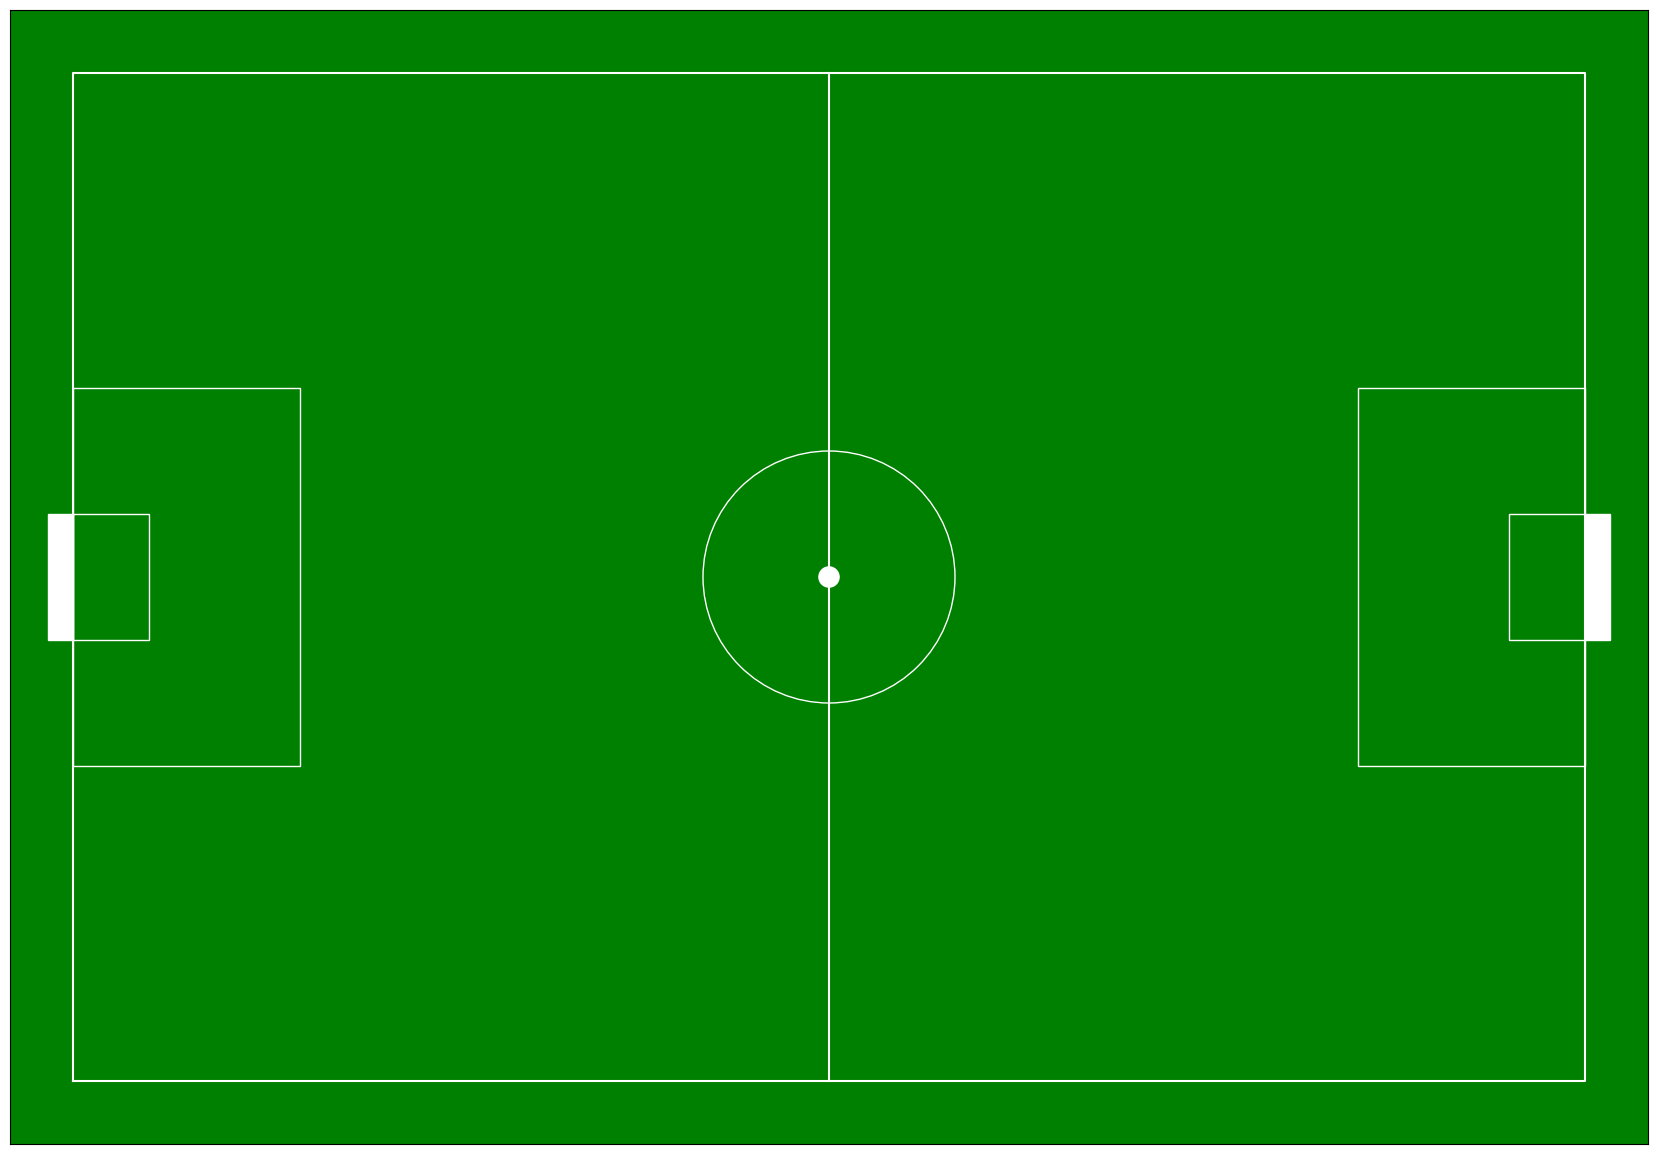

In [7]:
def pitch_edges(ax):
    # Pitch Outline & Center Line
    ax.set_facecolor("green")
    plt.plot([0, 0, 120, 120, 0], [0, 80, 80, 0, 0], color="white")
    plt.plot([60, 60], [0, 80], color="white")
    
    # Center Circle
    center_circle = plt.Circle((60, 40), 10, color="white", fill=False)
    ax.add_patch(center_circle)

    # Center Spot
    center_spot = plt.Circle((60, 40), 0.8, color="white")
    ax.add_patch(center_spot)

    # Penalty Areas
    ax.add_patch(patches.Rectangle((0, 25), 18, 30, fill=False, edgecolor="white"))
    ax.add_patch(patches.Rectangle((102, 25), 18, 30, fill=False, edgecolor="white"))

    # Six Yard Boxes
    ax.add_patch(patches.Rectangle((0, 35), 6, 10, fill=False, edgecolor="white"))
    ax.add_patch(patches.Rectangle((114, 35), 6, 10, fill=False, edgecolor="white"))

    # Goals
    ax.add_patch(patches.Rectangle((-2, 35), 2, 10, fill=True, color="white"))
    ax.add_patch(patches.Rectangle((120, 35), 2, 10, fill=True, color="white"))
    
    ax.set_xlim(-5, 125)
    ax.set_ylim(-5, 85)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

def add_stripes():
    # Create alternating green and light green vertical stripes
    stripe_width = 10
    for i in range(12):  # 12 stripes to cover 120 units of pitch width
        color = "#228B22" if i % 2 == 0 else "#32CD32"
        ax.add_patch(patches.Rectangle((i * stripe_width, 0), stripe_width, 80, color=color))


def draw_pitch(ax, stripes=True):
    if stripes == True: 
        add_stripes()
    pitch_edges(ax)

fig, ax = plt.subplots(figsize=(18, 12))
draw_pitch(ax, stripes=False)
#plt.title("Football Pitch")
plt.tight_layout(rect=[0, 0, 1, 0.97])
#plt.savefig("Outputs/Football Pitch.png")
plt.show()

<h2 style='font-family: Colonna MT; font-weight: 600; font-size: 20px; text-align: left'>3.0. Add Stripes to The Pitch</h2>

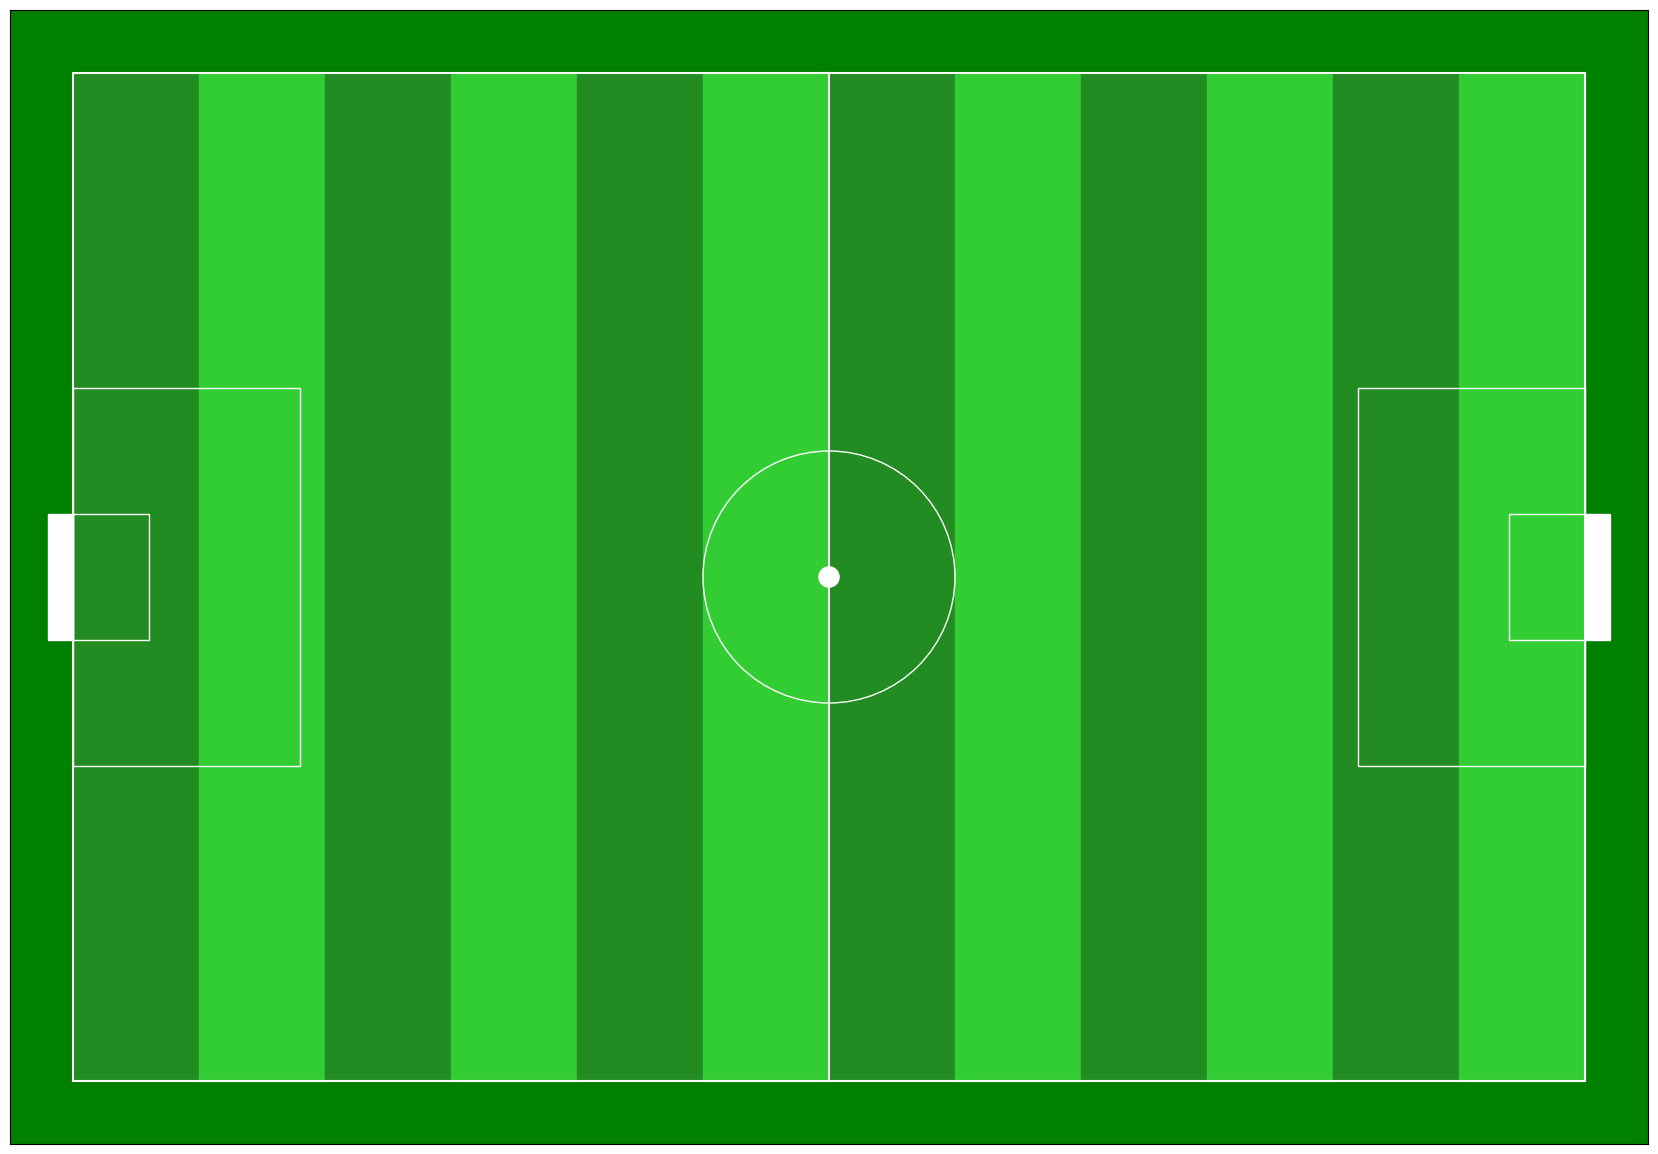

In [8]:
fig, ax = plt.subplots(figsize=(18, 12))
draw_pitch(ax, stripes=True)
#plt.title("Football Pitch")
plt.tight_layout(rect=[0, 0, 1, 0.97])
#plt.savefig("Outputs/Football Pitch.png")
plt.show()

<h2 style='font-family: Colonna MT; font-weight: 600; font-size: 20px; text-align: left'>4.0. Add Players to The Pitch based on different Team Formations </h2>

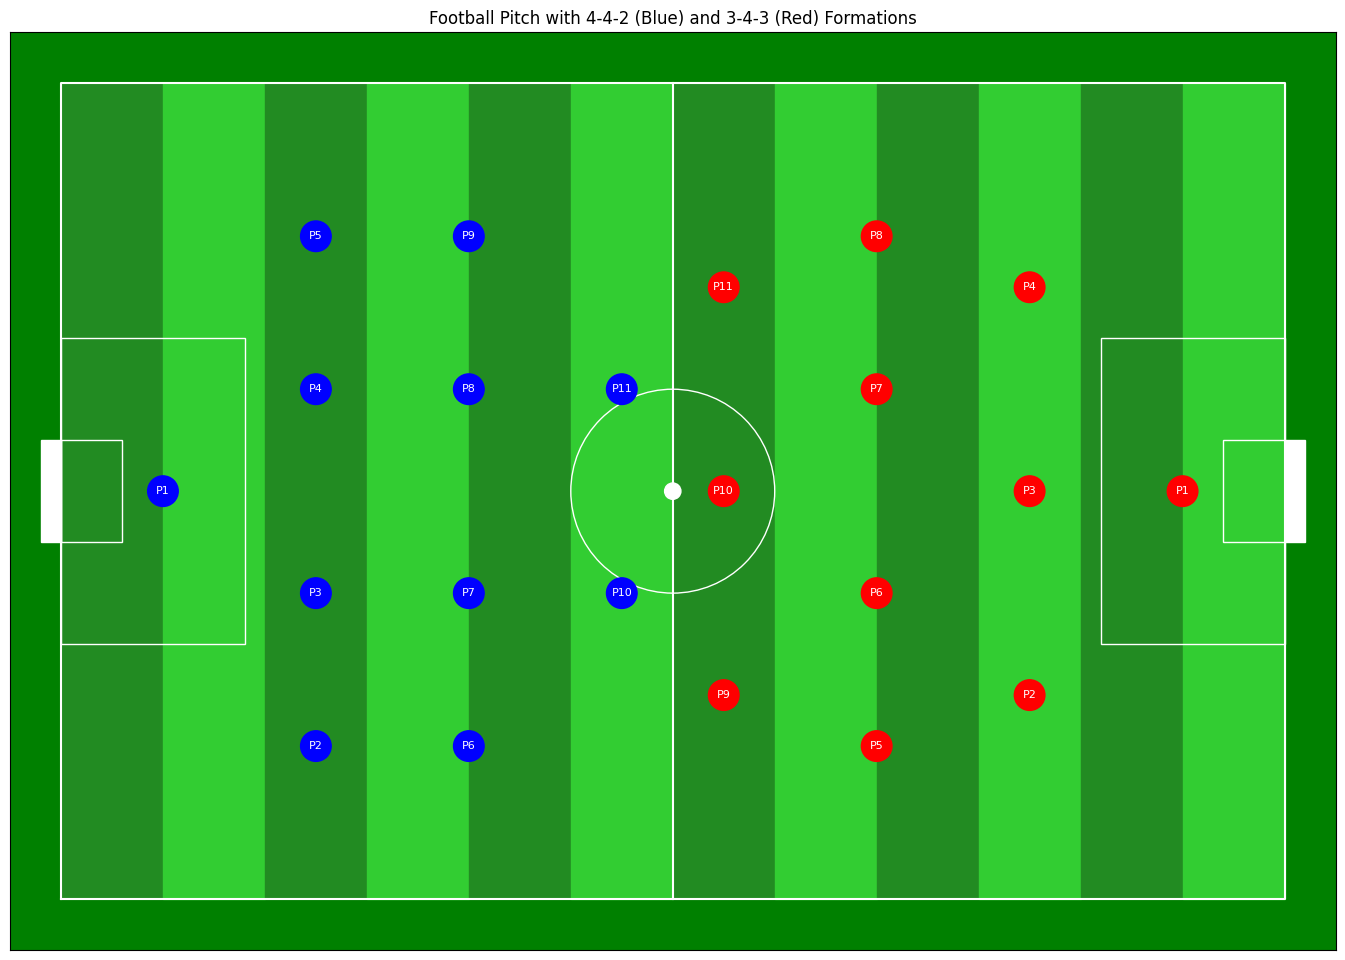

In [10]:
def plot_players(ax, positions, color, label_prefix):
    for i, (x, y) in enumerate(positions):
        circle = plt.Circle((x, y), 1.5, color=color)
        ax.add_patch(circle)
        ax.text(x, y, f"{label_prefix}{i+1}", color='white', ha='center', va='center', fontsize=8)

# Formation coordinates
formation_442 = {
    'positions': [(10, 40),  # Goalkeeper
                  (25, 15), (25, 30), (25, 50), (25, 65),  # Defenders
                  (40, 15), (40, 30), (40, 50), (40, 65),  # Midfielders
                  (55, 30), (55, 50)],  # Forwards
    'color': 'blue',
    'label_prefix': 'P'
}

formation_343 = {
    'positions': [(110, 40),  # Goalkeeper
                  (95, 20), (95, 40), (95, 60),  # Defenders
                  (80, 15), (80, 30), (80, 50), (80, 65),  # Midfielders
                  (65, 20), (65, 40), (65, 60)],  # Forwards
    'color': 'red',
    'label_prefix': 'P'
}

fig, ax = plt.subplots(figsize=(18, 10))
draw_pitch(ax, stripes=True)
plot_players(ax, **formation_442)
plot_players(ax, **formation_343)
plt.title("Football Pitch with 4-4-2 (Blue) and 3-4-3 (Red) Formations")
plt.tight_layout(rect=[0, 0, 1, 0.97])
#plt.savefig("Outputs/Football Pitch with 4-4-2 (Blue) and 3-4-3 (Red) Formations.png")
plt.show()

<h2 style='font-family: Colonna MT; font-weight: 600; font-size: 20px; text-align: left'>5.0. Automatic Team Formations Based on Simple Inputs </h2>

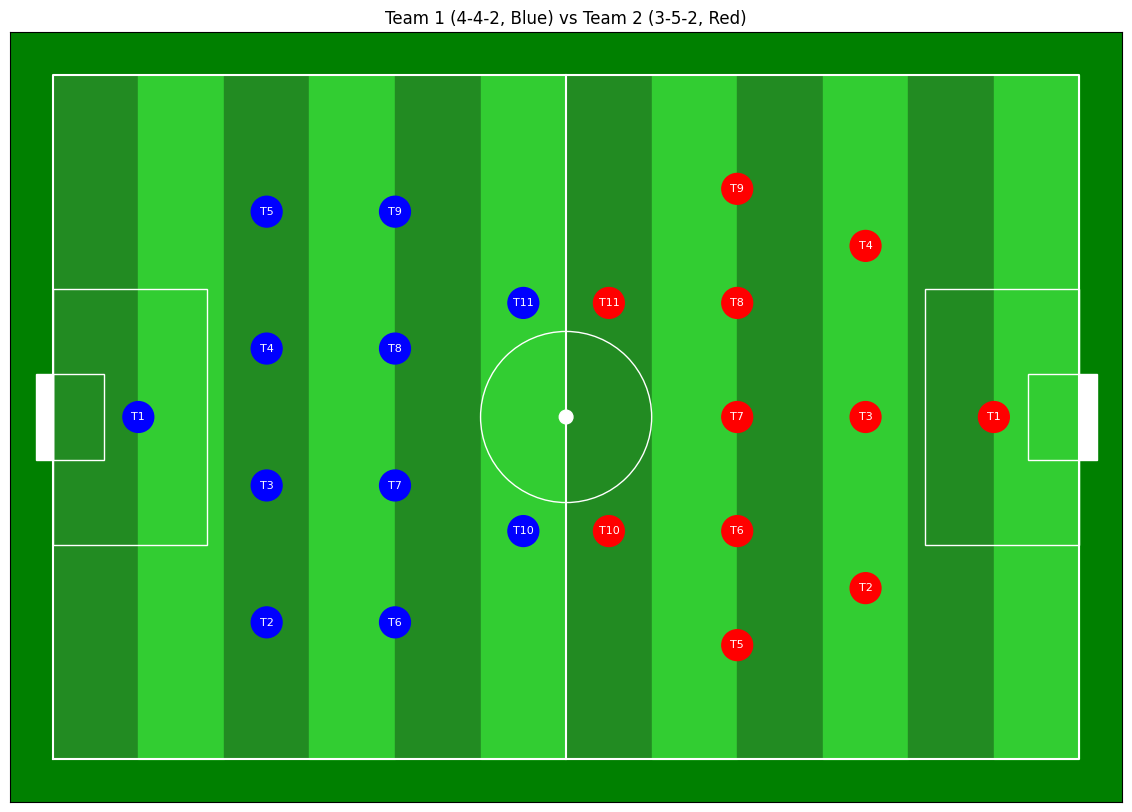

In [12]:
def generate_formation_positions(formation, side='left'):
    lines = list(map(int, formation.strip().split('-')))
    positions = []
    if side == 'left': x_base = [10, 25, 40, 55, 70][:len(lines)+1]
    else: x_base = [110, 95, 80, 65, 50][:len(lines)+1]
    positions.append((x_base[0], 40))  # Goalkeeper
    for i, num in enumerate(lines):
        x = x_base[i + 1]
        spacing = 80 / (num + 1)
        for j in range(num):
            y = spacing * (j + 1)
            positions.append((x, y))
    return positions

def plot_players(ax, positions, color, label_prefix):
    for i, (x, y) in enumerate(positions):
        circle = plt.Circle((x, y), 1.8, color=color)
        ax.add_patch(circle)
        ax.text(x, y, f"{label_prefix}{i+1}", color='white', ha='center', va='center', fontsize=8)

def team_formation_generator(ax, team1_form, team2_form):
    team1_positions = generate_formation_positions(team1_form, side='left')
    team2_positions = generate_formation_positions(team2_form, side='right')
    
    draw_pitch(ax, stripes=True)
    plot_players(ax, team1_positions, 'blue', 'T')
    plot_players(ax, team2_positions, 'red', 'T')
    plt.title(f"Team 1 ({team1_form}, Blue) vs Team 2 ({team2_form}, Red)")
    plt.show()

team1_input = '4-4-2'
team2_input = '3-5-2'

fig, ax = plt.subplots(figsize=(18, 10))
team_formation_generator(ax, team1_input, team2_input)

Enter Team 1 formation (e.g., 4-4-2):  3-5-2
Enter Team 2 formation (e.g., 3-5-2):  3-5-2


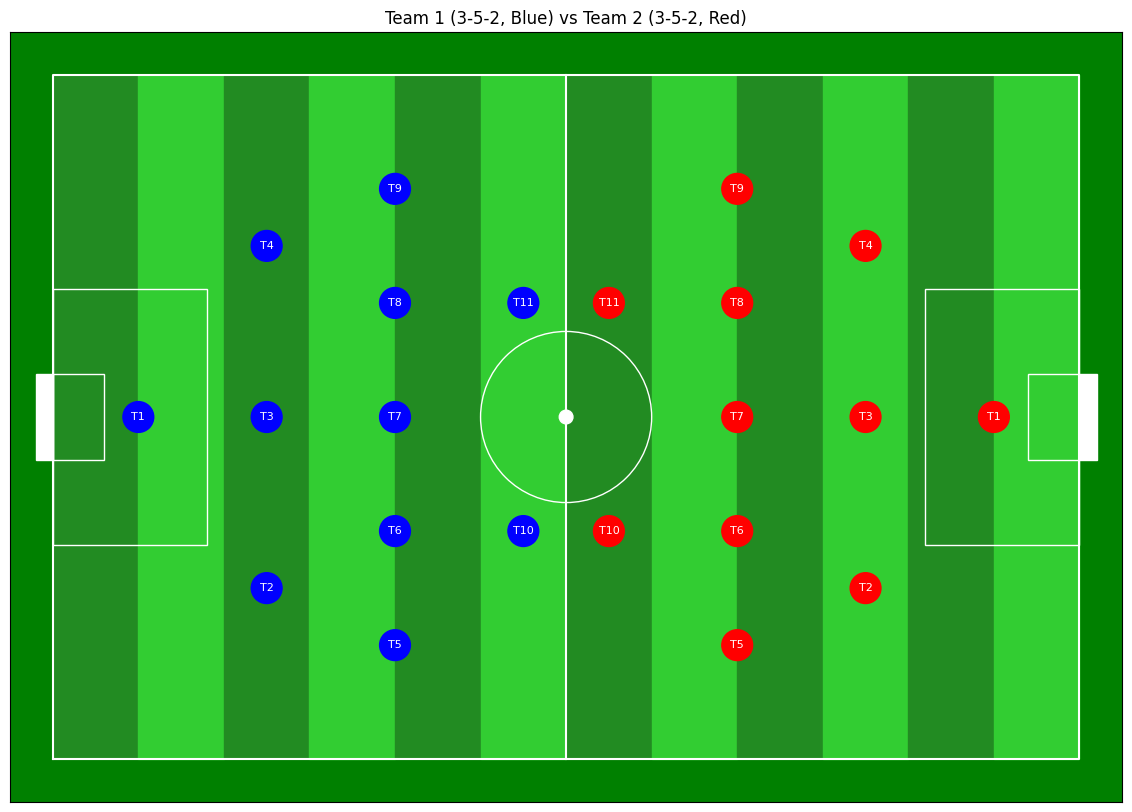

In [14]:
# Example input
team1_input = input("Enter Team 1 formation (e.g., 4-4-2): ")
team2_input = input("Enter Team 2 formation (e.g., 3-5-2): ")
fig, ax = plt.subplots(figsize=(18, 10))
team_formation_generator(ax, team1_input, team2_input)

<h2 style='font-family: Colonna MT; font-weight: 600; font-size: 20px; text-align: left'>6.0. Add Players Names to Team Formations </h2>

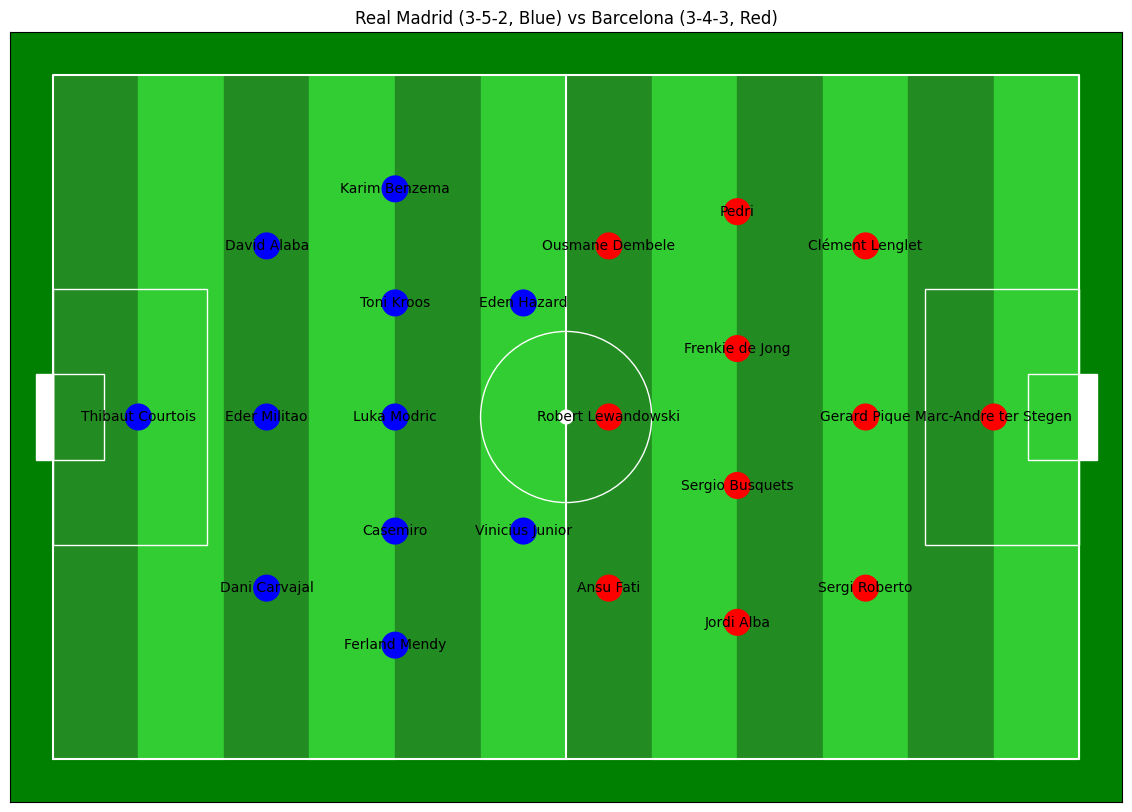

In [15]:
def generate_formation_positions(formation, side='left'):
    # Generate player positions from the formation dictionary
    lines = list(map(int, formation.strip().split('-')))
    positions = []
    if side == 'left':
        x_base = [10, 25, 40, 55, 70][:len(lines)+1]
    else:
        x_base = [110, 95, 80, 65, 50][:len(lines)+1]

    positions.append((x_base[0], 40))  # Goalkeeper

    for i, num in enumerate(lines):
        x = x_base[i + 1]
        spacing = 80 / (num + 1)
        for j in range(num):
            y = spacing * (j + 1)
            positions.append((x, y))
    return positions


def plot_players(ax, positions, color, player_dict):
    for i, (x, y) in enumerate(positions):
        circle = plt.Circle((x, y), 1.5, color=color)
        ax.add_patch(circle)
        
        # Get the player's name from the dictionary based on position
        player_name = player_dict.get(i, "Unknown")  # Use "Unknown" if player is not in dict
        ax.text(x, y, f"{player_name}", color='black', ha='center', va='center', fontsize=10,fontweight='normal')


def team_formation_generator(ax, team1_form, team1_dict, team2_form, team2_dict):
    team1_positions = generate_formation_positions(team1_form, side='left')
    team2_positions = generate_formation_positions(team2_form, side='right')

    draw_pitch(ax)
    plot_players(ax, team1_positions, 'blue', team1_dict)
    plot_players(ax, team2_positions, 'red', team2_dict)
    plt.title(f"Real Madrid ({team1_form}, Blue) vs Barcelona ({team2_form}, Red)")
    plt.show()


# Predefined player names for Real Madrid and Barcelona
real_madrid_players = {
    0: "Thibaut Courtois",  # Goalkeeper
    1: "Dani Carvajal", 2: "Eder Militao", 3: "David Alaba", 4: "Ferland Mendy",  # Defenders
    5: "Casemiro", 6: "Luka Modric", 7: "Toni Kroos",  # Midfielders
    8: "Karim Benzema", 9: "Vinicius Junior", 10: "Eden Hazard"  # Forwards
}

barcelona_players = {
    0: "Marc-Andre ter Stegen",  # Goalkeeper
    1: "Sergi Roberto", 2: "Gerard Pique", 3: "Clément Lenglet", 4: "Jordi Alba",  # Defenders
    5: "Sergio Busquets", 6: "Frenkie de Jong", 7: "Pedri",  # Midfielders
    8: "Ansu Fati", 9: "Robert Lewandowski", 10: "Ousmane Dembele"  # Forwards
}

# Example input: Team 1 and Team 2 formation
team1_input = '3-5-2'  # Real Madrid
team2_input = '3-4-3'  # Barcelona

fig, ax = plt.subplots(figsize=(18, 10))
team_formation_generator(ax, team1_input, real_madrid_players, team2_input, barcelona_players)

---

This analysis was performed by **Jabulente**, a passionate and dedicated data scientist with a strong commitment to using data to drive meaningful insights and solutions. For inquiries, collaborations, or further discussions, please feel free to reach out via.  

    
<div align="center">  
    
[![GitHub](https://img.shields.io/badge/GitHub-Jabulente-black?logo=github)](https://github.com/Jabulente)  [![LinkedIn](https://img.shields.io/badge/LinkedIn-Jabulente-blue?logo=linkedin)](https://linkedin.com/in/jabulente-208019349)  [![X (Twitter)](https://img.shields.io/badge/X-@Jabulente-black?logo=x)](https://x.com/Jabulente)  [![Instagram](https://img.shields.io/badge/Instagram-@Jabulente-purple?logo=instagram)](https://instagram.com/Jabulente)  [![Threads](https://img.shields.io/badge/Threads-@Jabulente-black?logo=threads)](https://threads.net/@Jabulente)  [![TikTok](https://img.shields.io/badge/TikTok-@Jabulente-teal?logo=tiktok)](https://tiktok.com/@Jabulente)  [![Email](https://img.shields.io/badge/Email-jabulente@hotmail.com-red?logo=gmail)](mailto:Jabulente@hotmail.com)  

</div>

</div>

<h1 style='font-size: 55px; color: Tomato; font-family: Colonna MT; font-weight: 700; text-align: center'>THE END</h1>